<a href="https://colab.research.google.com/github/abhishekpaul11/vehicle-classifier/blob/main/ANN_project_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 4.6MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 194kB 13.8MB/s 
     |████████████████████████████████| 1.1MB 14.7MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 40kB 7.1MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 2.6MB 27.4MB/s 
Mounted at /content/gdrive


In [ ]:
untar_data('https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz')

Path('/root/.fastai/data/cifar10')

In [ ]:
!mv /root/.fastai/data/cifar10 /content/gdrive/My\ Drive/fastai/ANN

In [ ]:
ls /content/gdrive/My\ Drive/fastai/ANN/train

airplane/  automobile/  bird/  cat/  deer/  dog/  frog/  horse/  ship/  truck/


In [ ]:
!pwd

/content


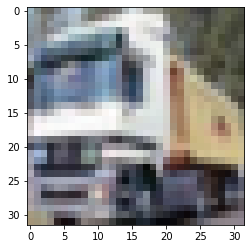

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading png image file 
im = img.imread('/content/gdrive/My Drive/fastai/ANN/train/cifar4/truck/0001.png') 
  
# show image 
plt.imshow(im) 

In [ ]:
vehicles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
path = Path("/content/gdrive/My Drive/fastai/ANN/train/cifar4")

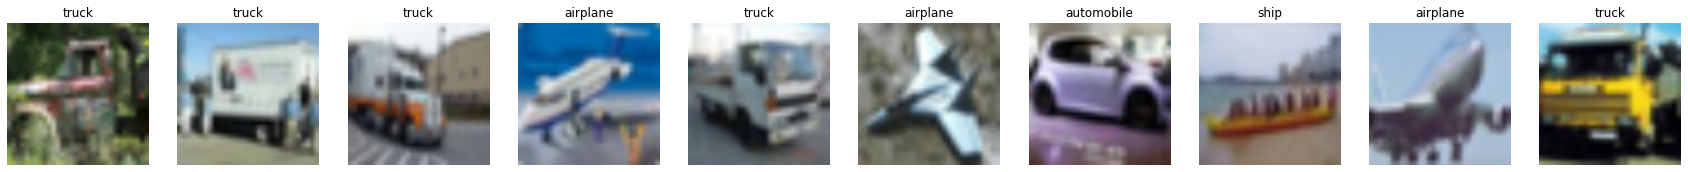

In [ ]:
dls = vehicles.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=1)

In [ ]:
dls.c

4

In [ ]:
vehicles = vehicles.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = vehicles.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.772743,0.375663,0.132750,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.301013,0.172209,0.057250,02:12
1,0.223897,0.107141,0.039250,02:14
2,0.146606,0.082357,0.029500,02:14
3,0.119168,0.075593,0.026750,02:14


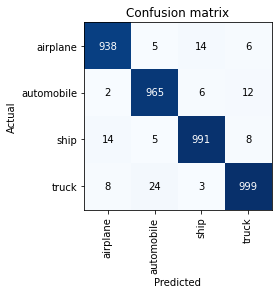

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

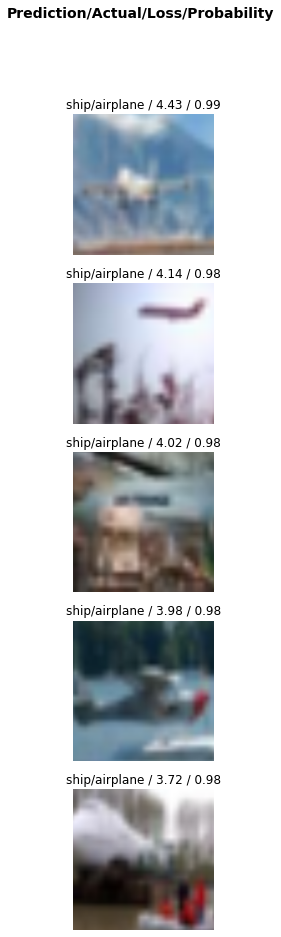

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
learn.export(fname = 'vehicles_project_final.pkl')

#Inference

In [ ]:
learn = load_learner('/content/gdrive/My Drive/fastai/ANN/train/vehicles_project_final.pkl')

In [ ]:
learn.predict('/content/gdrive/My Drive/fastai/ANN/train/airplane.jpg')

('airplane',
 tensor(0),
 tensor([8.9798e-01, 7.6726e-05, 1.0169e-01, 2.5685e-04]))

In [ ]:
learn.predict('/content/gdrive/My Drive/fastai/ANN/train/automobile.jpg')

('automobile',
 tensor(1),
 tensor([3.4981e-02, 9.4388e-01, 6.8914e-04, 2.0448e-02]))

In [ ]:
learn.predict('/content/gdrive/My Drive/fastai/ANN/train/ship.jpg')

('airplane',
 tensor(0),
 tensor([5.7495e-01, 6.1547e-05, 4.2467e-01, 3.1410e-04]))

In [ ]:
learn.predict('/content/gdrive/My Drive/fastai/ANN/train/truck.jpg')

('truck', tensor(3), tensor([6.0839e-04, 5.0959e-04, 4.9283e-06, 9.9888e-01]))

In [ ]:
learn.predict('/content/ship.png')

('ship', tensor(2), tensor([7.6605e-02, 1.5441e-06, 9.2339e-01, 4.4072e-07]))